In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import bars
import u

# Data Generation

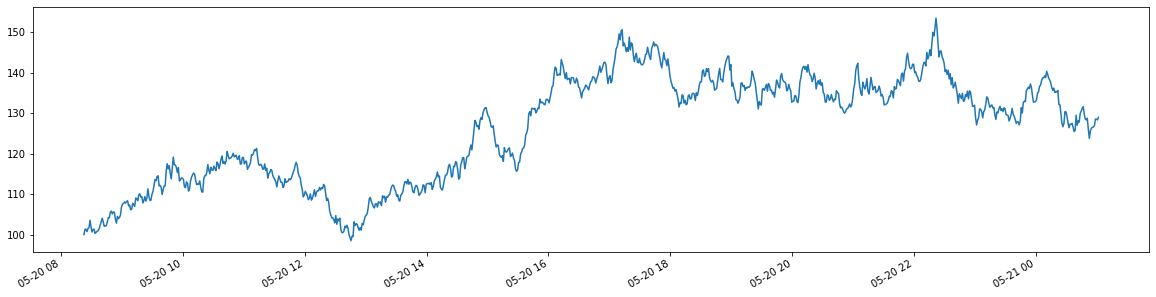

<AxesSubplot:>

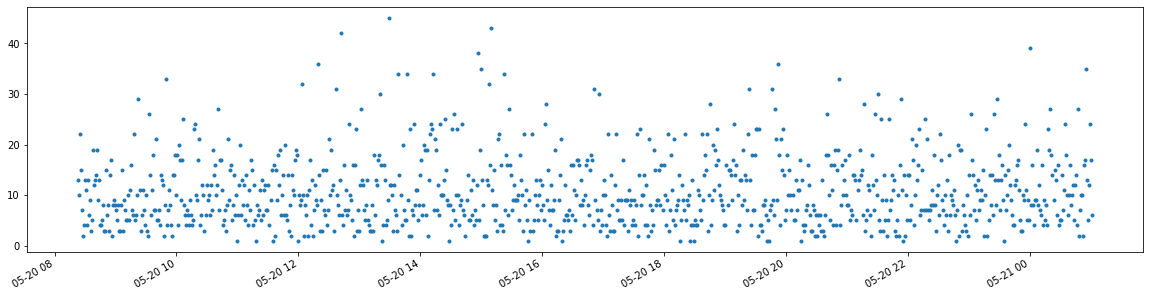

In [2]:
plt.rcParams["figure.figsize"] = (20, 5)

data = u.create_price_data(theta=0.0001, start_price=100, n_samples=1000)
data["close"].plot.line()

# CUSUM

In [5]:
def get_cusum_indices(prices: pd.Series, percentage_threshold: float = 0.05):
    returns = prices.shift(1) / prices - 1
    returns.fillna(0)
    indices = np.full(prices.size, False)

    positive_cusum = 0.
    negative_cusum = 0.
    for e, (_, r) in enumerate(returns.iteritems()):
        positive_cusum = max(0, positive_cusum + r)
        negative_cusum = min(0, negative_cusum + r)
        if positive_cusum > percentage_threshold or negative_cusum < -percentage_threshold:
            positive_cusum = 0
            negative_cusum = 0
            indices[e] = True
    return indices

In [6]:
indices = get_cusum_indices(data["close"])

<AxesSubplot:>

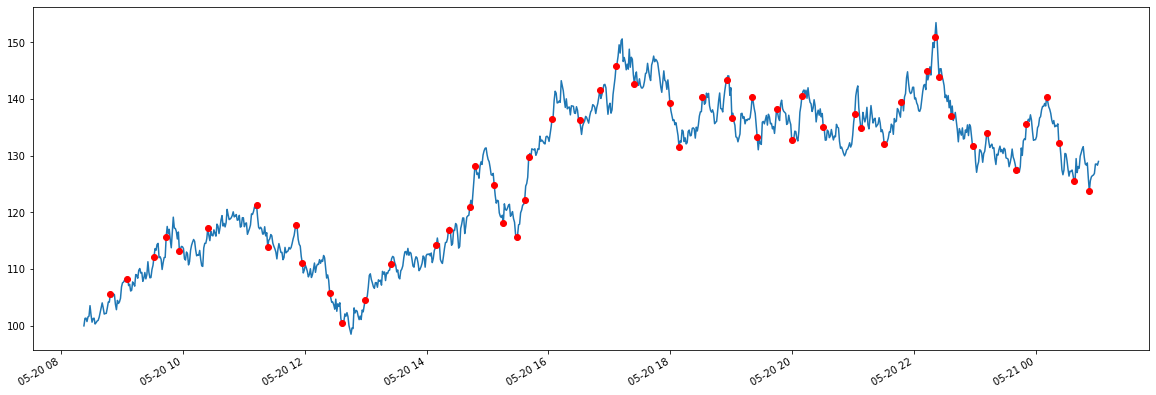

In [9]:
plt.rcParams["figure.figsize"] = (20, 7)

data["close"].plot.line()
(data["close"] * indices).replace(0, np.nan).plot(style="o", color="r")